In [1]:
#from: https://github.com/iShkiper/DSP_24.M20_21/blob/main/%D0%9A%D0%BE%D0%B4/1.5.0%20IIR%20filters_on.ipynb

In [2]:
from random import random
from scipy.io.wavfile import write
from scipy.signal import lfilter, freqz

import numpy as np
import matplotlib.pyplot as plt
import IPython.display as display
from scipy import signal
import IPython

from scipy.io import wavfile

import numpy as np
import matplotlib.pyplot as plt

# создание фильтра КС
def get_KS_filter(M, alpha):
    b = np.array([1]) 
    a = np.array([1] + ([0]*(M-1)) + [-alpha]) 
    return b,a   

In [3]:
def get_note(freq, dur, fs, alpha=0.996):
    """
    Генерация звукового сигнала ноты с помощью алгоритма Карплюса-Стронга.

    Параметры:
    - freq (float): частота ноты в Гц.
    - dur (float): длительность ноты в секундах.
    - fs (int): частота дискретизации в Гц.
    - alpha (float, optional): коэффициент затухания (0 < alpha < 1). По умолчанию 0.996.

    Возвращает:
    - sig (np.ndarray): одномерный массив сгенерированного аудиосигнала.
    """
    # Определяем количество сэмплов для ноты
    N = int(np.floor(dur * fs))
    # Порядок задержки M: приблизительно fs / freq
    M = int(np.round(fs / freq))

    # Генерируем начальный шум (сигнал возбуждения) длиной M
    noise = (2 * np.random.rand(M) - 1).astype(np.float32)

    # Подготовка выходного сигнала
    sig = np.zeros(N, dtype=np.float32)

    # Получаем коэффициенты фильтра KS
    b, a = get_KS_filter(M, alpha)

    # Инициализация буфера задержки
    # Используем deque для эффективного сдвига
    from collections import deque
    buffer = deque(noise)

    # Основной цикл Карплюса-Стронга
    for i in range(N):
        # Текущий выход = первый элемент буфера
        sig[i] = buffer[0]
        # Среднее между первыми двумя элементами в буфере
        avg = alpha * 0.5 * (buffer[0] + buffer[1])
        # Удаляем первый элемент
        buffer.popleft()
        # Добавляем новое значение в конец буфера
        buffer.append(avg)

    # Нормируем амплитуду
    sig /= np.max(np.abs(sig))
    return sig

In [7]:
sig = get_note(440, 3, fs = 44100)
display.Audio(sig, rate=44100, embed=True)

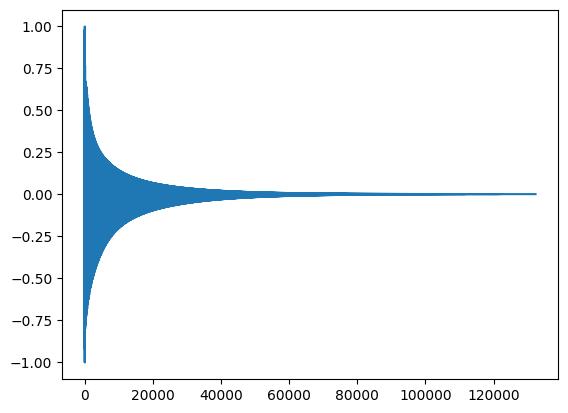

In [8]:
plt.plot(sig)

In [26]:
def get_melody(melody, fs):
    dur = 0.15
    x = []
    for note in melody:
        x = x + list(get_note(note, dur, fs))        
    
    return np.array(x)

In [27]:
notes = ['A', 'A#', 'Bb', 'B', 'C', 'C#', 'Db', 'D', 'D#', 'Eb', 'E', 'F', 'F#', 'Gb', 'G', 'G#', 'Ab']
valueSet = [0,1,1,2,3,4,4,5,6,6,7,8,9,9,10,11,11]

noteDict = dict(zip(notes, valueSet))

song = ['E','F','B','E','F','C','E','F','C#','E','F','C','E','F','B','B']

melody = [440 * 2 ** (noteDict[note]/12) for note in song]

In [28]:
x = get_melody(melody, fs)

display.Audio(x, rate=44100, embed=True)  # guess the riff